In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [52]:
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001

In [20]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
x_train

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 3.1  ]], dtype=float32)

In [26]:
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype='float32')

# is (np.float32 == 'float32') true?

In [28]:
y_train

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

In [34]:
x_train.dtype == y_train.dtype

True

In [117]:
model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [118]:
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 50 == 0:
        print('Epoch:[{0}/{1}]\tLoss:{2:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch:[50/1000]	Loss:0.3920
Epoch:[100/1000]	Loss:0.3768
Epoch:[150/1000]	Loss:0.3715
Epoch:[200/1000]	Loss:0.3664
Epoch:[250/1000]	Loss:0.3614
Epoch:[300/1000]	Loss:0.3565
Epoch:[350/1000]	Loss:0.3518
Epoch:[400/1000]	Loss:0.3471
Epoch:[450/1000]	Loss:0.3426
Epoch:[500/1000]	Loss:0.3382
Epoch:[550/1000]	Loss:0.3339
Epoch:[600/1000]	Loss:0.3297
Epoch:[650/1000]	Loss:0.3256
Epoch:[700/1000]	Loss:0.3217
Epoch:[750/1000]	Loss:0.3178
Epoch:[800/1000]	Loss:0.3140
Epoch:[850/1000]	Loss:0.3103
Epoch:[900/1000]	Loss:0.3068
Epoch:[950/1000]	Loss:0.3033
Epoch:[1000/1000]	Loss:0.2999


In [119]:
# .data()方法和.detach()方法都能返回不带梯度的tensor，但使用data()后得到的数字被修改时，原导数值也会变了，所以推荐使用detach()
predicted = model(inputs).detach().numpy()

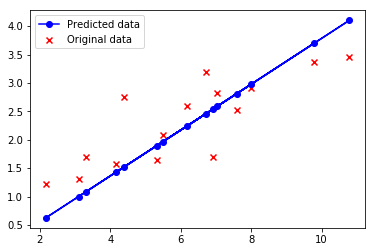

In [120]:
graph = plt.figure()
plt.scatter(x_train, y_train, c='r', marker='x', label='Original data')
plt.plot(x_train, predicted, c='b', marker='o', label='Predicted data')
plt.legend()
plt.show()

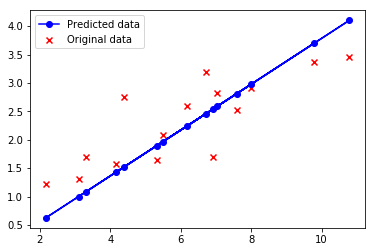

In [121]:
graph

In [122]:
torch.save(model.state_dict(), './linear_regression.ckpt')

In [124]:
checkpoint = torch.load('linear_regression.ckpt')
model_ = nn.Linear(input_size, output_size)
model_.load_state_dict(checkpoint)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [130]:
model.state_dict()

OrderedDict([('weight', tensor([[0.4036]])), ('bias', tensor([-0.2516]))])

In [131]:
model_.state_dict()

OrderedDict([('weight', tensor([[0.4036]])), ('bias', tensor([-0.2516]))])